In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
R = 40e6  #Ohm
C = 250e-12 #F

V_rep = -70e-3 #V
V_L = -50e-3   #V
V_redef = -65e-3   #V
V0 = V_rep  #V

tau_ref = 2e-3     #s
dt = 0.01e-3   #s
tmax = 2    #s

I_L = ( V_L - V_rep ) / R   #A

In [4]:
valores_corrente = np.arange(I_L - 100e-12, I_L + 400e-12, 10e-12)
valores_frequenciaNumerica = np.zeros(np.size(valores_corrente))
valores_frequenciaAnalitica = np.zeros(np.size(valores_corrente))

t = np.arange(0, tmax, dt)

interacoes = 200000

limiar = np.full(200000, V_L)

In [5]:
def solucao(v0, dt, interacoes, I):
    disparos = 0

    V = np.zeros(interacoes)
    V[0] = v0

    for i in range(interacoes-1):
        v = V[i]
        if v >= V_L:
            v = V_redef
            disparos += 1

        V[i+1] = v + dt * ( 1/R * (V_rep - v) + I ) / C

    return V, disparos

In [6]:
for i in range(np.size(valores_corrente)):
    I = valores_corrente[i]

    V, disparos = solucao(V0, dt, interacoes, I)

    if I >= I_L:
        intervaloDisparos = tau_ref +  C*R * np.log( (V_rep + R*I - V_redef) / (V_rep + R*I - V_L) )
        frequenciaAnalitica = 1 / intervaloDisparos
    else:
        frequenciaAnalitica = 0

    frequenciaNumerica = disparos / tmax


    valores_frequenciaNumerica[i] = frequenciaNumerica
    valores_frequenciaAnalitica[i] = frequenciaAnalitica

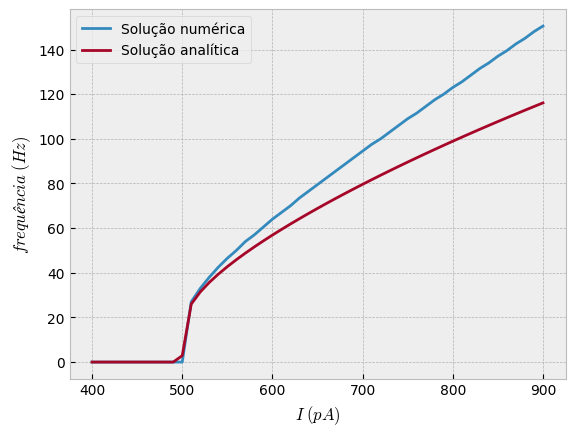

In [11]:
plt.style.use('bmh')

plt.figure()

plt.plot(valores_corrente*1e12, valores_frequenciaNumerica, label='Solução numérica')
plt.plot(valores_corrente*1e12, valores_frequenciaAnalitica, label='Solução analítica')
plt.legend()

plt.ylabel(r'$frequência \; (Hz)$')
plt.xlabel(r'$I \; (pA)$')


plt.show()